# Proyek Analisis Data Dengan Python:
- **Nama:** 'Asalul Musaffa
- **Email:** asalulmu01@gmail.com
- **ID Dicoding:** asalulzy

## Menentukan Pertanyaan

1. Bagaimana tren pencemaran udara di sekitar station Aotizhongxin?
2. Pada musim apa polusi udara tertinggi?
3. Apakah ada perbedaan tingkat kualitas udara pada siang dan malam hari? waktu mana yang lebih aman dari polutan?
4. Apakah senyawa polutan berpartisipasi pada pembentukan ozon pada lapisan troposfer?(menggunakan analisis korelasi)

## Import Semua Packages yang dipakai

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as py
import datetime

def print_library_versions():
    print("Pandas version:", pd.__version__)
    print("NumPy version:", np.__version__)
    print("Seaborn version:", sns.__version__)
    print("Matplotlib version:", plt.matplotlib.__version__)
    print("SciPy version:", py.__version__)

print_library_versions()

Pandas version: 2.1.4
NumPy version: 1.26.4
Seaborn version: 0.13.1
Matplotlib version: 3.7.1
SciPy version: 1.13.1


## Data Wrangling

### Gathering Data

In [2]:
url = "https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/"

Data_Aotizhongxin = pd.read_csv(url + "PRSA_Data_Aotizhongxin_20130301-20170228.csv")
Data_Changping = pd.read_csv(url + "PRSA_Data_Changping_20130301-20170228.csv")

In [3]:
Data_Aotizhongxin.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [4]:
Data_Changping.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


# Assessing Data

### Data Type

In [5]:
Data_Aotizhongxin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


### missing value

In [6]:
Data_Aotizhongxin.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,925
PM10,718
SO2,935
NO2,1023
CO,1776


### data duplikat

In [7]:
Data_Aotizhongxin.duplicated().sum()

0

### statistik deskriptif

In [8]:
Data_Aotizhongxin.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


Insight:
1. Jumlah data yang tersedia adalah 35064 baris data.
2. Data berisi data time series mulai tahun 2013 hingga 2017.
3. Masih terdapat banyak data kosong yang harus ditangani sebelum melakukan analisi lebih lanjut.
4. Tidak terdapat indikasi adanya duplikasi data.
5. Data tahun, bulan, hari, dan jam masih dibuat terpisah dalam kolom yang berbeda.


### cleaning data

In [9]:
# Menggabungkan year dan month menjadi kolom datetime dengan day=1 (default)
Data_Aotizhongxin['datetime'] = pd.to_datetime(Data_Aotizhongxin[['year', 'month']].assign(day=1))

# Menghapus kolom year dan month karena sudah tidak diperlukan
Data_Aotizhongxin = Data_Aotizhongxin.drop(columns=['year', 'month'])

# Menampilkan informasi DataFrame setelah perubahan
print(Data_Aotizhongxin.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No        35064 non-null  int64         
 1   day       35064 non-null  int64         
 2   hour      35064 non-null  int64         
 3   PM2.5     34139 non-null  float64       
 4   PM10      34346 non-null  float64       
 5   SO2       34129 non-null  float64       
 6   NO2       34041 non-null  float64       
 7   CO        33288 non-null  float64       
 8   O3        33345 non-null  float64       
 9   TEMP      35044 non-null  float64       
 10  PRES      35044 non-null  float64       
 11  DEWP      35044 non-null  float64       
 12  RAIN      35044 non-null  float64       
 13  wd        34983 non-null  object        
 14  WSPM      35050 non-null  float64       
 15  station   35064 non-null  object        
 16  datetime  35064 non-null  datetime64[ns]
dtypes: datetime6

insight:
Data tahun dan bulan sudah berhasil digabungkan menjadi suatu variabel dengan tipe data datetime.

In [10]:
#melihat semua data yang memiliki data kosong pada suatu variebel
Data_Aotizhongxin[Data_Aotizhongxin.TEMP.isna()]

,No,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
16748,16749,27,20,26.0,42.0,12.0,78.0,1300.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin,2015-01-01
17263,17264,18,7,13.0,14.0,12.0,22.0,600.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin,2015-02-01
31047,31048,14,15,75.0,75.0,4.0,20.0,700.0,209.0,NaN,NaN,NaN,NaN,SW,3.1,Aotizhongxin,2016-09-01
31315,31316,25,19,168.0,168.0,2.0,77.0,1500.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin,2016-09-01
31316,31317,25,20,182.0,182.0,2.0,82.0,1600.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin,2016-09-01
31317,31318,25,21,137.0,146.0,2.0,44.0,1400.0,122.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin,2016-09-01
31318,31319,25,22,107.0,107.0,2.0,34.0,1300.0,108.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin,2016-09-01
31319,31320,25,23,95.0,95.0,2.0,38.0,1200.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin,2016-09-01
31320,31321,26,0,89.0,89.0,2.0,37.0,1000.0,64.0,NaN,NaN,NaN,NaN,NE,2.4,Aotizhongxin,2016-09-01
33872,33873,10,8,8.0,8.0,4.0,34.0,300.0,45.0,NaN,NaN,NaN,NaN,NW,2.6,Aotizhongxin,2017-01-01


In [11]:
#melakukan imputasi data kosonh dengan cara interpolasi pada variabel numerik
Data_Aotizhongxin.WSPM.interpolate(method='linear', limit_direction='forward', inplace=True)
Data_Aotizhongxin['PM2.5'].interpolate(method='linear', limit_direction='forward', inplace=True)
Data_Aotizhongxin.PM10.interpolate(method='linear', limit_direction='forward', inplace=True)
Data_Aotizhongxin.SO2.interpolate(method='linear', limit_direction='forward', inplace=True)
Data_Aotizhongxin.NO2.interpolate(method='linear', limit_direction='forward', inplace=True)
Data_Aotizhongxin.CO.interpolate(method='linear', limit_direction='forward', inplace=True)
Data_Aotizhongxin.O3.interpolate(method='linear', limit_direction='forward', inplace=True)
Data_Aotizhongxin.TEMP.interpolate(method='linear', limit_direction='forward', inplace=True)
Data_Aotizhongxin.PRES.interpolate(method='linear', limit_direction='forward', inplace=True)
Data_Aotizhongxin.DEWP.interpolate(method='linear', limit_direction='forward', inplace=True)
Data_Aotizhongxin.RAIN.interpolate(method='linear', limit_direction='forward', inplace=True)

In [12]:
#mengecek kembali jumlah data kosong
Data_Aotizhongxin.isna().sum()

,0
No,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0


In [13]:
#menangani data kosong pada variabel kategorik dengan inputasi nilai modus
Data_Aotizhongxin.wd.fillna(value=Data_Aotizhongxin.wd.mode()[0], inplace=True)

In [14]:
#mengecek kembali jumlah data kosong
Data_Aotizhongxin.isna().sum()

,0
No,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0


insight:
Missing value sudah berhasil ditangani dengan menggunakan interpolasi dan inputasi nilai modus.

In [15]:
# Fungsi untuk mengklasifikasikan musim berdasarkan suhu
def classify_season(temp):
    if temp < 0:
        return 'Gelombang Dingin'
    elif 0 <= temp < 10:
        return 'Musim Dingin'
    elif 10 <= temp < 20:
        return 'Musim Semi'
    elif 20 <= temp < 35:
        return 'Musim Panas'
    elif temp >= 35:
        return 'Gelombang Panas'
    else:
        return 'Tidak Diketahui'

# Terapkan fungsi ke kolom TEMP untuk mengklasifikasikan setiap suhu
Data_Aotizhongxin['Season'] = Data_Aotizhongxin['TEMP'].apply(classify_season)

# Menampilkan DataFrame dengan kolom baru 'Season' yang berisi klasifikasi musim
Data_Aotizhongxin

,No,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime,Season
0,1,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01,Gelombang Dingin
1,2,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01,Gelombang Dingin
2,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01,Gelombang Dingin
3,4,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01,Gelombang Dingin
4,5,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01,Gelombang Dingin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin,2017-02-01,Musim Semi
35060,35061,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin,2017-02-01,Musim Semi
35061,35062,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin,2017-02-01,Musim Semi
35062,35063,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin,2017-02-01,Musim Semi


Insight:
Dilakukan klasifikasi musim berdasarkan suhu dan menyimpannya sebagai varieabel baru.

In [16]:
Data_Aotizhongxin.to_csv("all_data.csv", index=False)

# EDA

### analisis univariat

In [17]:
Data_Aotizhongxin.describe()

,No,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064
mean,17532.500000,15.729637,11.500000,82.540623,110.210033,17.459251,59.074106,1264.692405,55.328626,13.581414,1011.851650,3.120296,0.067383,1.708577,2015-02-14 06:29:19.342915840
min,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000,2013-03-01 00:00:00
25%,8766.750000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000,2014-03-01 00:00:00
50%,17532.500000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000,2015-03-01 00:00:00
75%,26298.250000,23.000000,17.250000,114.000000,154.000000,22.000000,81.000000,1500.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000,2016-02-01 00:00:00
max,35064.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000,2017-02-01 00:00:00
std,10122.249256,8.800218,6.922285,81.956401,95.262531,22.702284,37.000918,1239.411826,57.327470,11.400426,10.404517,13.690314,0.909798,1.204180,NaN


<ipython-input-18-70fe84458fb7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wd_counts.index, y=wd_counts.values, orient='v', palette=colors)


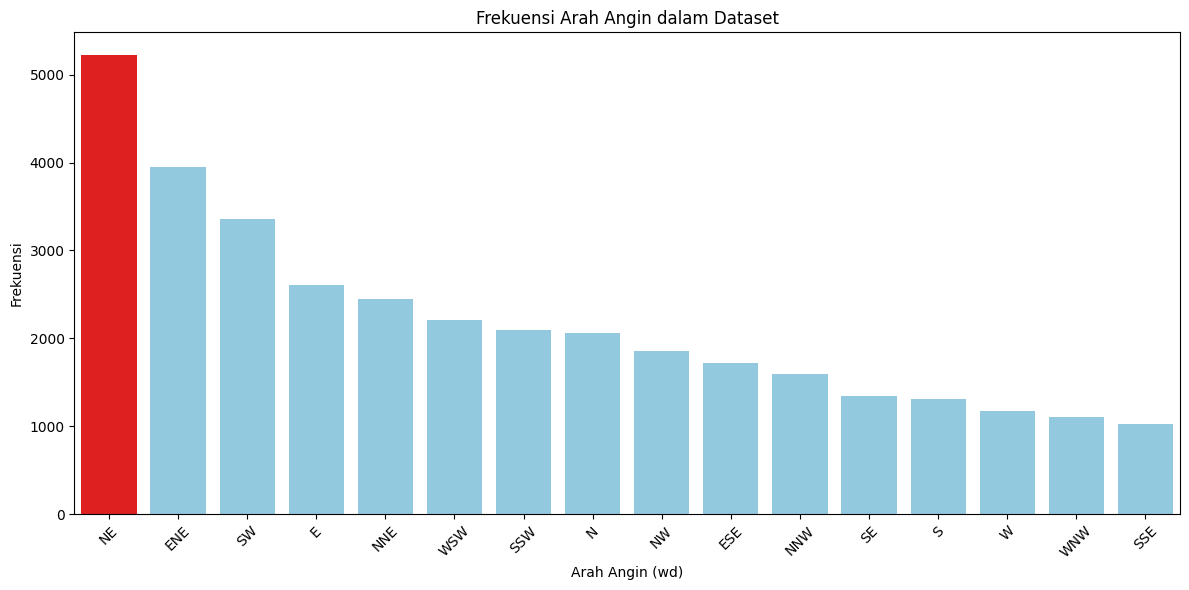

In [18]:
plt.figure(figsize=(12, 6))

# Menghitung jumlah kemunculan setiap kategori di kolom 'wd'
wd_counts = Data_Aotizhongxin['wd'].value_counts()

# Menentukan warna: merah untuk kategori dengan frekuensi tertinggi, biru untuk lainnya
colors = ['red' if i == wd_counts.max() else 'skyblue' for i in wd_counts]

# Membuat bar plot
sns.barplot(x=wd_counts.index, y=wd_counts.values, orient='v', palette=colors)

plt.xlabel("Arah Angin (wd)")
plt.ylabel("Frekuensi")
plt.title("Frekuensi Arah Angin dalam Dataset")
plt.xticks(rotation=45)  # Memutar label sumbu x untuk kejelasan
plt.tight_layout()
plt.show()



insight:
Arah mata angin yang terdeteksi oleh statiun Aotizhongxin didonminasi oleh NE yang artinya angin cenderung lebih sering berhembus kearah 'Timur Laut'.

<ipython-input-19-4ab4dc68d31b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wd_counts.index, y=wd_counts.values, orient='v', palette=colors)


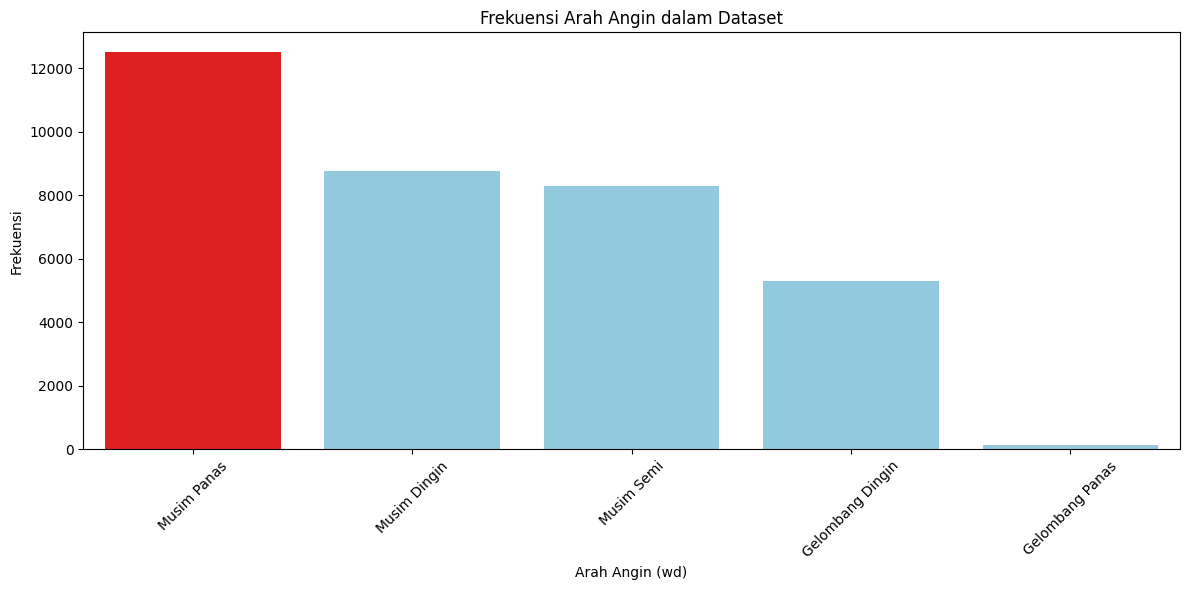

In [19]:
plt.figure(figsize=(12, 6))

# Menghitung jumlah kemunculan setiap kategori di kolom 'wd'
wd_counts = Data_Aotizhongxin['Season'].value_counts()

# Menentukan warna: merah untuk kategori dengan frekuensi tertinggi, biru untuk lainnya
colors = ['red' if i == wd_counts.max() else 'skyblue' for i in wd_counts]

# Membuat bar plot
sns.barplot(x=wd_counts.index, y=wd_counts.values, orient='v', palette=colors)

plt.xlabel("Arah Angin (wd)")
plt.ylabel("Frekuensi")
plt.title("Frekuensi Arah Angin dalam Dataset")
plt.xticks(rotation=45)  # Memutar label sumbu x untuk kejelasan
plt.tight_layout()
plt.show()

insight:
Berdasarkan data suhu yang dicatat pada statiun Aotizhongxin diketahui bahwa musim panas dengan suhu antara 20-34 C lebih dominan terjadi dibandingkan dengan musim-musim yang lain.

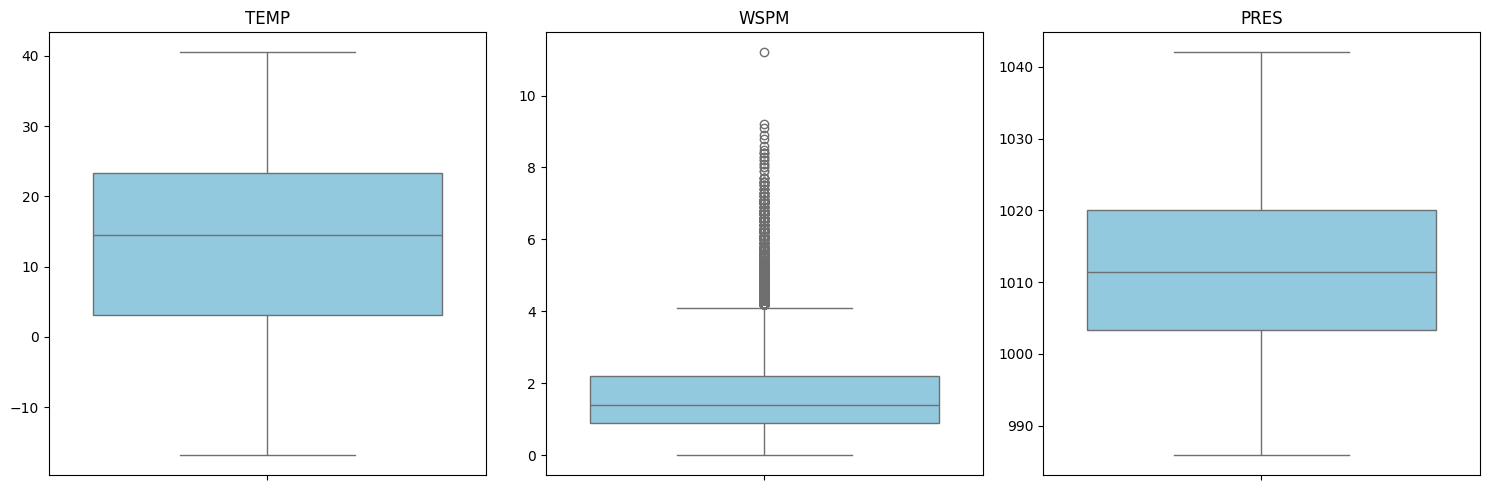

In [20]:
# Membuat boxplot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
data_cuaca = ['TEMP', 'WSPM', 'PRES']
Datac = Data_Aotizhongxin[data_cuaca]

# Iterasi untuk setiap variabel cuaca
for i, ax in enumerate(axs):
    sns.boxplot(y=Datac.iloc[:, i], orient='v', ax=ax, color='skyblue')
    ax.set_title(data_cuaca[i])
    ax.set_ylabel("")

plt.tight_layout()
plt.show()


### analisis multivariat


Text(0, 0.5, 'PM10')

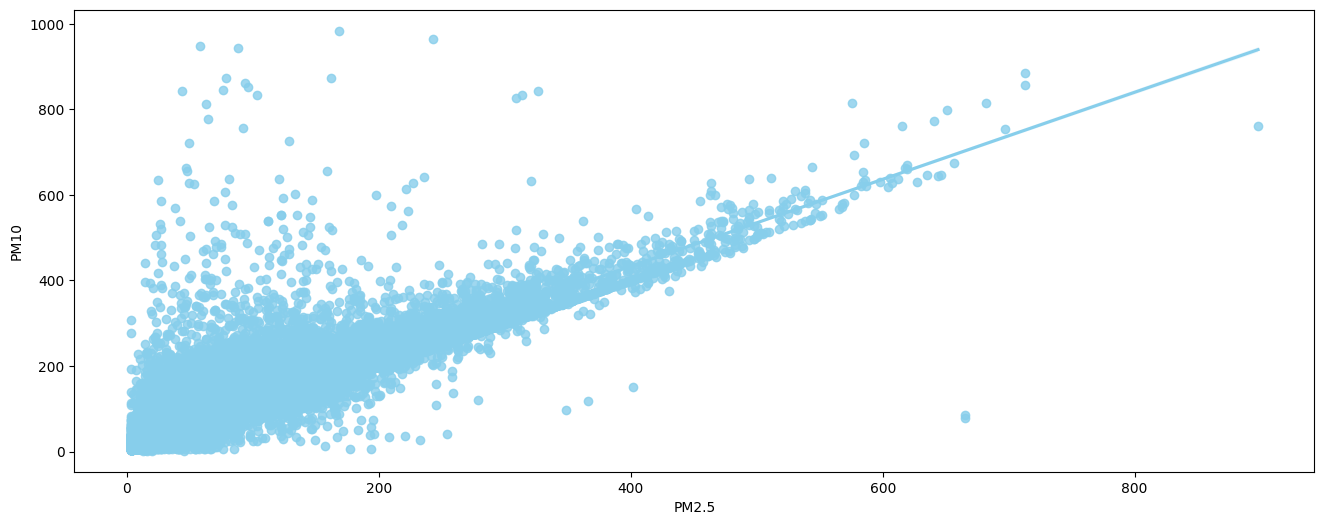

In [21]:
plt.figure(figsize=(16,6))
sns.regplot(x='PM2.5', y='PM10', data=Data_Aotizhongxin, color='skyblue')
plt.xlabel("PM2.5")
plt.ylabel("PM10")

insight:
Terdapat korelasi yang cukup kuat antara partikel mikro 10 dan partikel mikro 2.5. Hal ini mengindikasikan bahwa peningkatan PM10 bisa meningkatkan PM2.5.

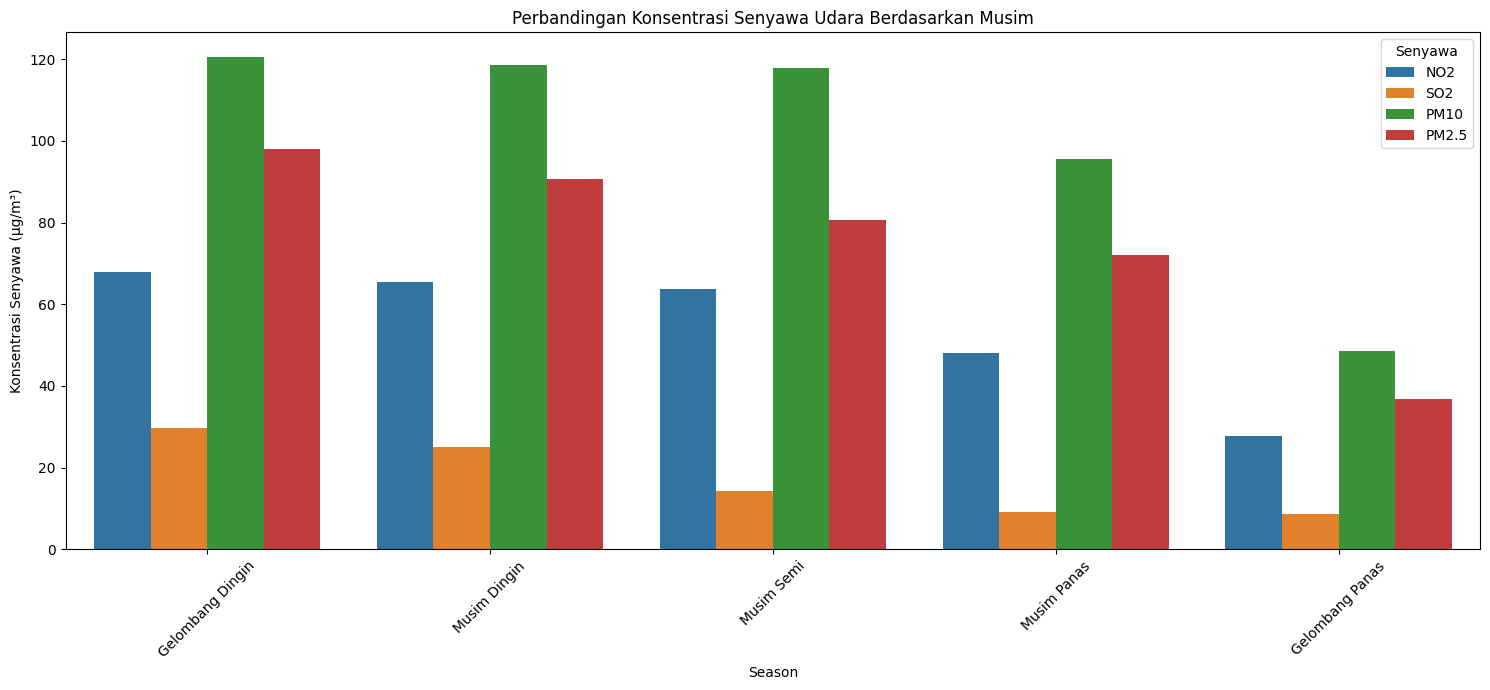

In [22]:
# Definisi order musim (pastikan ini ada dalam dataset kamu)
season_order = ['Gelombang Dingin', 'Musim Dingin', 'Musim Semi', 'Musim Panas', 'Gelombang Panas']

# Membuat DataFrame baru yang berisi senyawa yang ingin dibandingkan
senyawa = ['NO2', 'SO2', 'PM10', 'PM2.5']
data_senyawa = Data_Aotizhongxin.groupby('Season')[senyawa].mean().reindex(season_order)

# Mengubah DataFrame menjadi long format untuk seaborn
data_senyawa_melted = data_senyawa.reset_index().melt(id_vars='Season', value_vars=senyawa, var_name='Senyawa', value_name='Konsentrasi')

# Membuat barplot side-by-side untuk setiap senyawa berdasarkan musim
plt.figure(figsize=(15, 7))
sns.barplot(x='Season', y='Konsentrasi', hue='Senyawa', data=data_senyawa_melted, order=season_order)

# Label dan judul
plt.xlabel("Season")
plt.ylabel("Konsentrasi Senyawa (µg/m³)")
plt.title("Perbandingan Konsentrasi Senyawa Udara Berdasarkan Musim")
plt.legend(title='Senyawa')
plt.xticks(rotation=45)

# Memperbaiki layout
plt.tight_layout()
plt.show()



insight:
Bisa disimpulkan bahwa terjadi kenaikan tingkat polusi pada senyawa-senyawa pada musin dengan suhu yang relatif rendah.

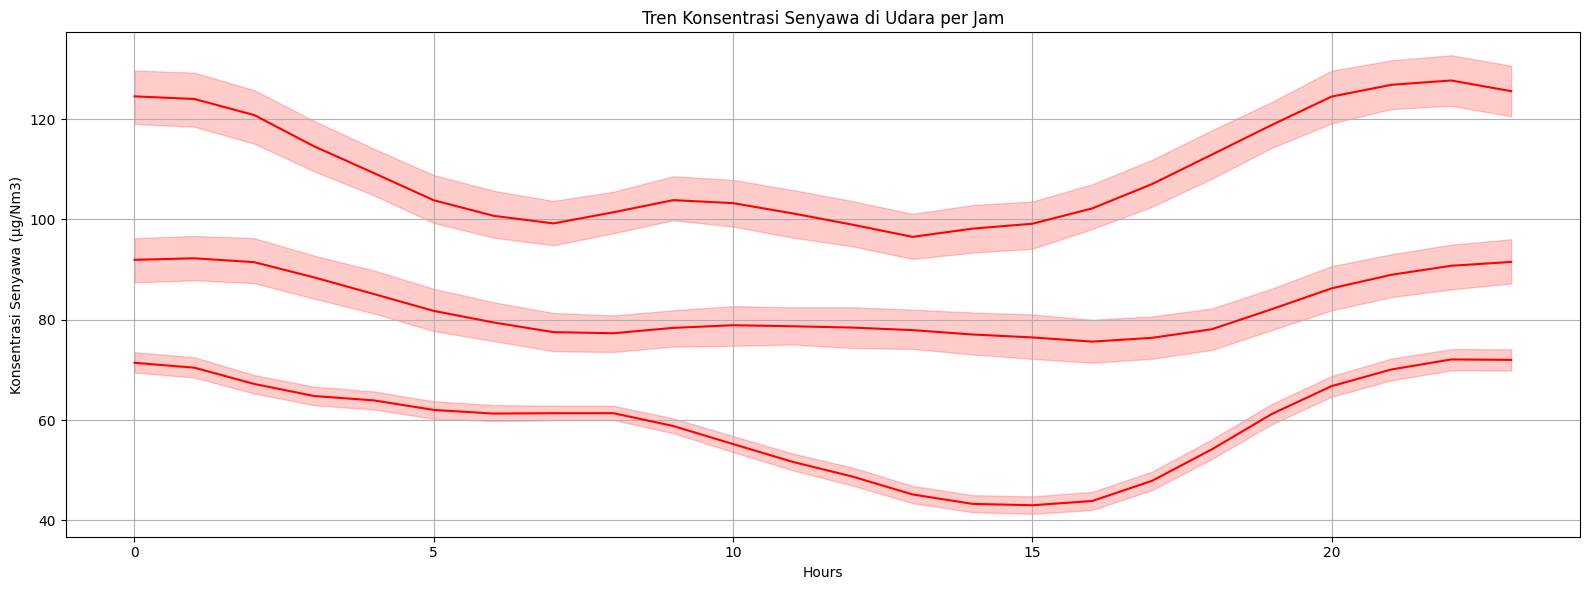

In [23]:
plt.figure(figsize=(16, 6))

# Membuat line chart untuk tren level NO2
sns.lineplot(x="hour", y="NO2", data=Data_Aotizhongxin, color='red')
sns.lineplot(x="hour", y="PM2.5", data=Data_Aotizhongxin, color='red')
sns.lineplot(x="hour", y="PM10", data=Data_Aotizhongxin, color='red')

plt.xlabel("Hours")
plt.ylabel("Konsentrasi Senyawa (µg/Nm3)")
plt.title("Tren Konsentrasi Senyawa di Udara per Jam")

plt.grid(True)  # Menambahkan grid agar tren lebih jelas
plt.tight_layout()
plt.show()

Insight:
Terdapat tren yang cukup sama antara NO2, PM10, dan PM2.5, dimana peningkatan terjadi pada malam hari atau keadaan tanpa matahari dan cenderung menurun saat matahari muncul. Hal ini bisa terjadi karena pengaruh suhu dan reaksi kimia serta pengaruh arah angin.

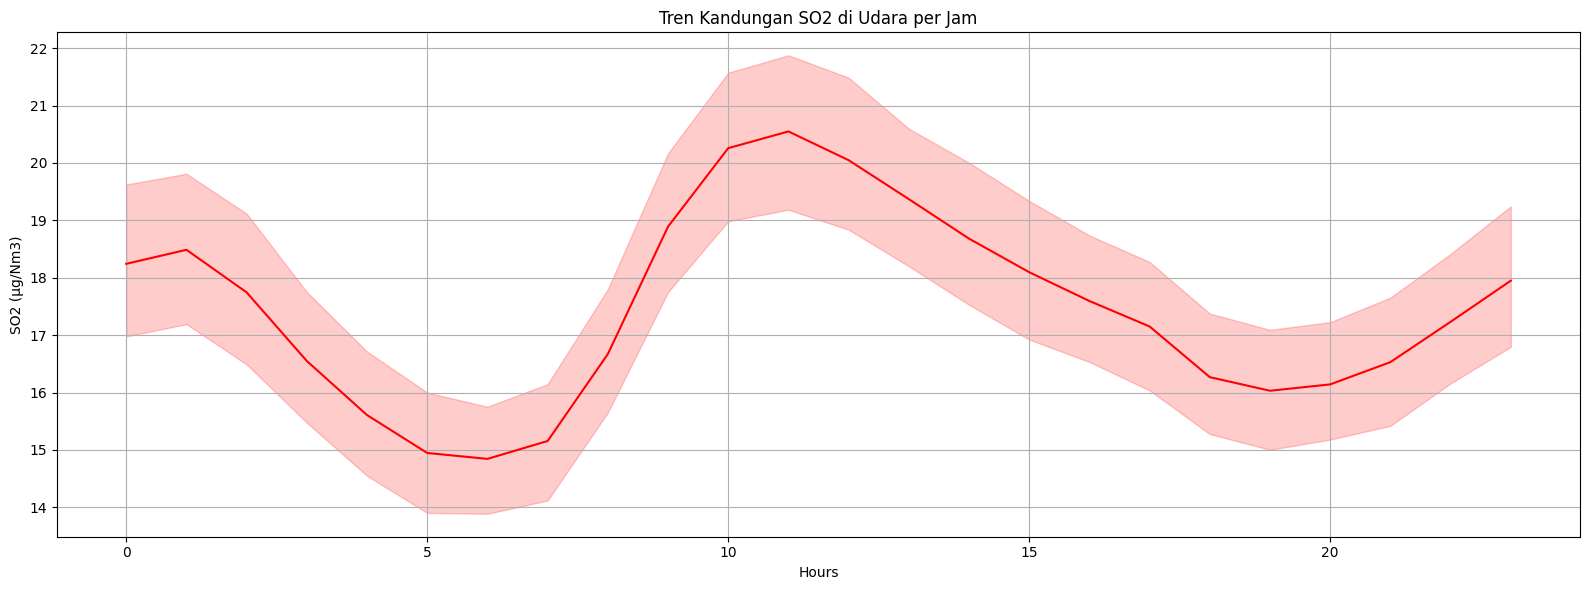

In [24]:
plt.figure(figsize=(16, 6))

# Membuat line chart untuk tren level NO2
sns.lineplot(x="hour", y="SO2", data=Data_Aotizhongxin, color='red')

plt.xlabel("Hours")
plt.ylabel("SO2 (µg/Nm3)")
plt.title("Tren Kandungan SO2 di Udara per Jam")

plt.grid(True)  # Menambahkan grid agar tren lebih jelas
plt.tight_layout()
plt.show()

Insight:
Berbeda dengan variabel NO2 serta partikel mikro, SO2 cenderung meningkat pada malam dan siang hari. Hal ini bisa terjadi karena pada jam kerja aktivitas kendaraan bermotor, transportasi, serta kegiatan industry cenderung meningkat. Hal inilah yang menyebabkan bisa terjadinya peningkatan produksi SO2 pada jam kerja.

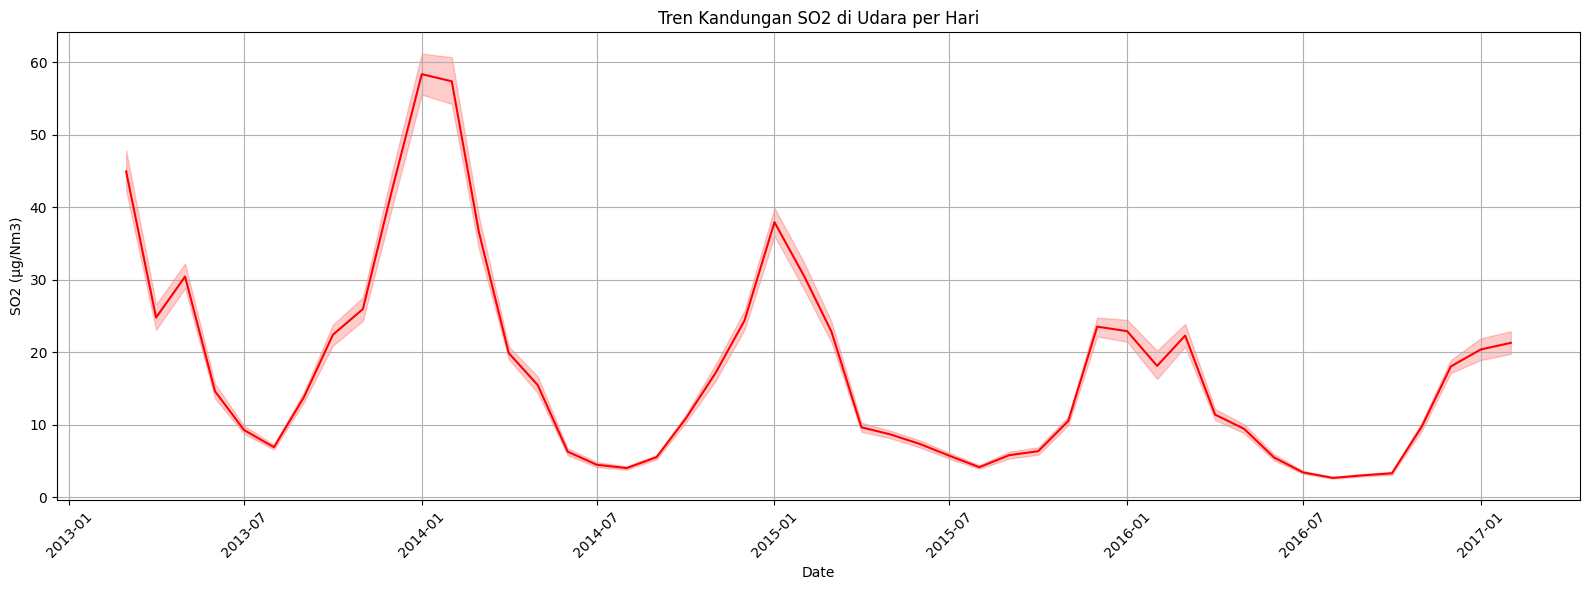

In [25]:
plt.figure(figsize=(16, 6))

# Membuat line chart untuk tren level SO2
sns.lineplot(x="datetime", y="SO2", data=Data_Aotizhongxin, color='red')


plt.xlabel("Date")
plt.ylabel("SO2 (µg/Nm3)")
plt.title("Tren Kandungan SO2 di Udara per Hari")

plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca
plt.grid(True)  # Menambahkan grid agar tren lebih jelas
plt.tight_layout()
plt.show()

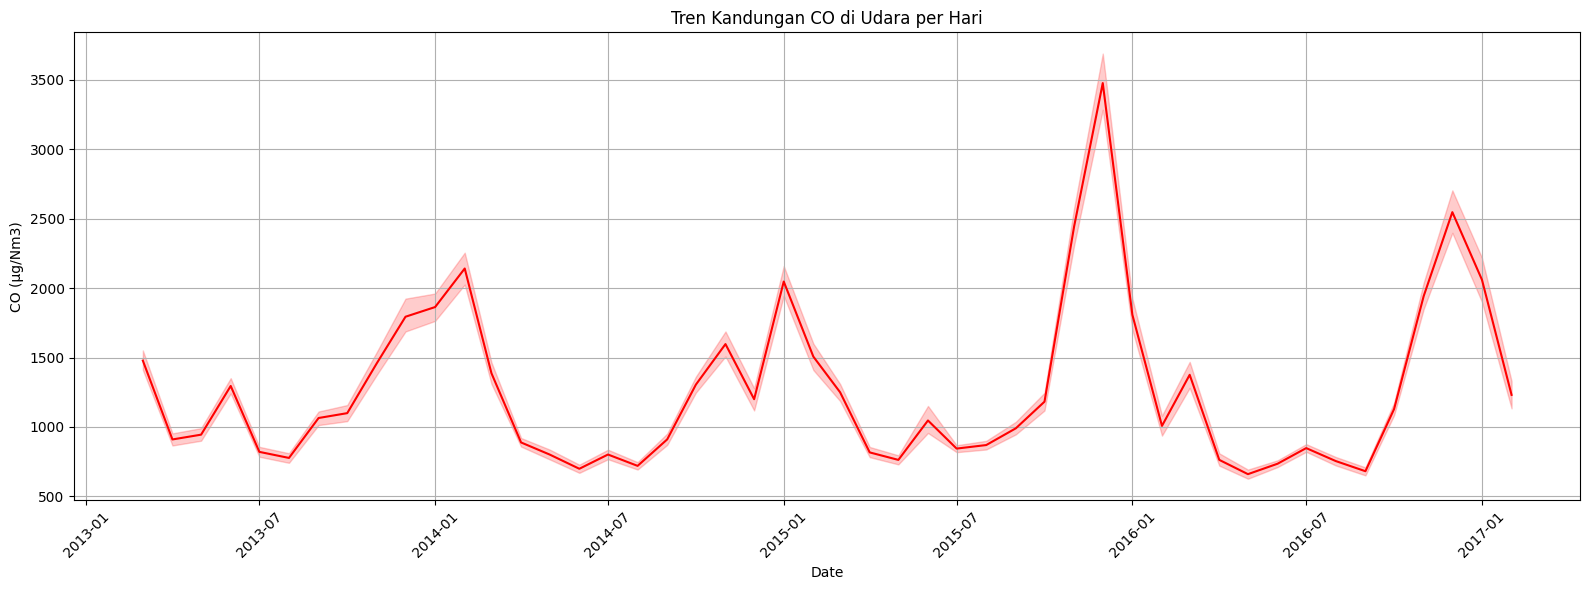

In [26]:
plt.figure(figsize=(16, 6))

# Membuat line chart untuk tren CO level
sns.lineplot(x="datetime", y="CO", data=Data_Aotizhongxin, color='red')

plt.xlabel("Date")
plt.ylabel("CO (µg/Nm3)")
plt.title("Tren Kandungan CO di Udara per Hari")

plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca
plt.grid(True)  # Menambahkan grid agar tren lebih jelas
plt.tight_layout()
plt.show()

Insight:
pada kedua grafik tersebut, dapat dilihat pola kenaikan polusi udara oleh senyawa SO2 dan CO selalu meningkat saat mendekati akhir tahun dan menurun pada saat awal tahun.

### Matriks korelasi dan heatmap

<Axes: >

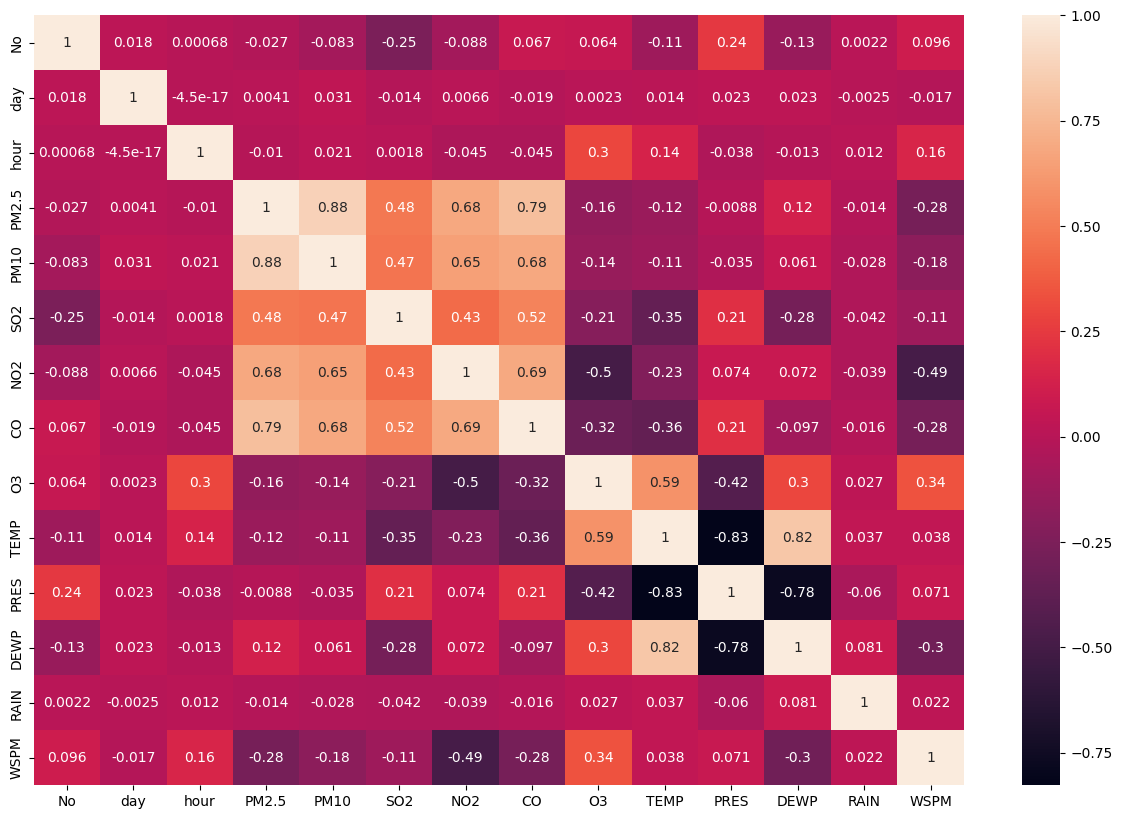

In [27]:
plt.figure(figsize=(15, 10))
sns.heatmap(Data_Aotizhongxin.corr(numeric_only=True), annot=True)

Insight:
Berdasarkan heatmap diatas, dapat diketahui korelasi antar setiap variabel. selain itu bisa dilihat bahwa hujan secara konsisten berpengaruh negatif terhadap Partikel Mikro dan Senyawa-senyawa yang menyebabkan pencemaran udara. Hal ini mengindikasikan bahwa terjadinya hujan dapat mengurangi polusi udara yang terjadi dilingkungan tersebut.

# Menjawab pertanyaan berdasarkan visualization dan Explanatory analysis

1. Bagaimana tren pencemaran udara di sekitar station Aotizhongxin?
- jawaban: Pencemaran udara sangat bergantung pada suhu, sehingga pencemaran yang disebabkan oleh partikel mikro dan NO2 menurun pada siang hari dan cenderung meningkat pada malam hari, sebaliknya terjadi pada SO2 yang meningkat pada saat jam kerja dan malam hari bisa disebabkan oleh aktivitas transportasi dan industry yang berlansung.
Berdasarkan bulan, polusi udara cenderung meningkat sejak mendekati akhir tahun dan menurun setelah awal tahun.
2. Pada musim apa polusi udara tertinggi?
- Jawaban:
Polusi udara tertinggi terjadi pada musin dengan udara yang cenderung dingin (musim dingin dan gelombang dingin).
3. Apakah ada perbedaan tingkat kualitas udara pada siang dan malam hari? waktu mana yang lebih aman dari polutan?
- Jawaban:
Polusi udara oleh NO2 dan partikel mikro cenderung menurun pada siang hari dan meningkat pada malam, sebaliknya terjadi pada SO2 yang cenderung meningkat pada jam kerja namun juga tetap tinggi pada malam hari. sehingga kedua waktu tersebut memiliki tingkat polusi udara yang cenderung hampir sama.
4. Apakah senyawa polutan berpartisipasi pada pembentukan ozon pada lapisan troposfer?(menggunakan analisis corelasi)
- Jawaban: Apabila merujuk pada nilai korelasi, hubungan senyawa polutan terhadap ozon cenderung negatif dimana hal ini bisa mengindikasikan bahwa peningkatan senyawa ozon tidak sejalan dengan ozon, hal ini bisa terjadi mengingat ozon adalah penguraian dari senyawa-senyawa termasuk NO2 sehingga peleburan senyawa akan membentuk ozon.